In [1]:
def set_hep_style(dark=False, high_dpi = False):
    # Base CMS style first
    hep.style.use("CMS")

    if dark:
        # --- Soft dark adjustments ---
        mpl.rcParams.update({
            # Backgrounds
            "figure.facecolor": "#1e1f22",   # soft dark gray
            "axes.facecolor":   "#1e1f22",
            "savefig.facecolor": "#1e1f22",

            # Axes / ticks / labels
            "axes.edgecolor": "#e0e0e0",
            "axes.labelcolor": "#e0e0e0",
            "xtick.color": "#cccccc",
            "ytick.color": "#cccccc",
            "text.color": "#f0f0f0",
            "grid.color": "#404040",
            "axes.grid": False,  # you can toggle to True if you prefer faint grid

            # Lines / markers / patches
            "lines.linewidth": 1.6,
            "patch.edgecolor": "#1e1f22",

            # Legend
            "legend.facecolor": "#2a2b2f",
            "legend.edgecolor": "#2a2b2f",
            "legend.framealpha": 0.7,
        })

        # Define a complementary color palette (muted but distinct)
        dark_colors = [
            "#6FA3EF",  # soft blue
            "#F6C85F",  # golden yellow
            "#9BDFBA",  # mint green
            "#E45756",  # coral red
            "#CBA0E3",  # lavender
            "#72B7B2",  # teal
        ]
        plt.rcParams["axes.prop_cycle"] = plt.cycler(color=dark_colors)

    else:
        # revert to normal CMS light mode palette if needed
        hep.style.use("CMS")
    if high_dpi:
        hep.style.use("CMS")
    else:
        mpl.rcParams.update({"figure.dpi": 50,})


In [3]:
import hist
import matplotlib as mpl
import matplotlib.pyplot as plt
import pickle as pkl
import mplhep as hep
from integrate_rebin import rebin_hist
set_hep_style(dark = False, high_dpi=True)

In [4]:
%load_ext autoreload
%autoreload 2

In [6]:
filename1 = 'powheg_output_no_syst.pkl'
filename2 = 'background_ST.pkl'
filename3 = 'pythia_ht_LO_output_no_syst.pkl'


with open(filename1, "rb") as f:
    out1 = pkl.load( f)
with open(filename2, "rb") as f:
    out2 = pkl.load( f)
with open(filename3, "rb") as f:
    out3 = pkl.load( f)
print(out1.keys())

dict_keys(['ptjet_mjet_u_reco', 'ptjet_mjet_g_reco', 'response_matrix_u', 'response_matrix_g', 'ptjet_mjet_u_gen', 'ptjet_mjet_g_gen', 'ptz_mz_reco', 'sumw', 'nev', 'cutflow'])


(exptext: Custom Text(0.001, 1, 'CMS'),
 expsuffix: Custom Text(0.001, 1.005, 'Simulation Internal'),
 supptext: Custom Text(1.012, 1, ''))

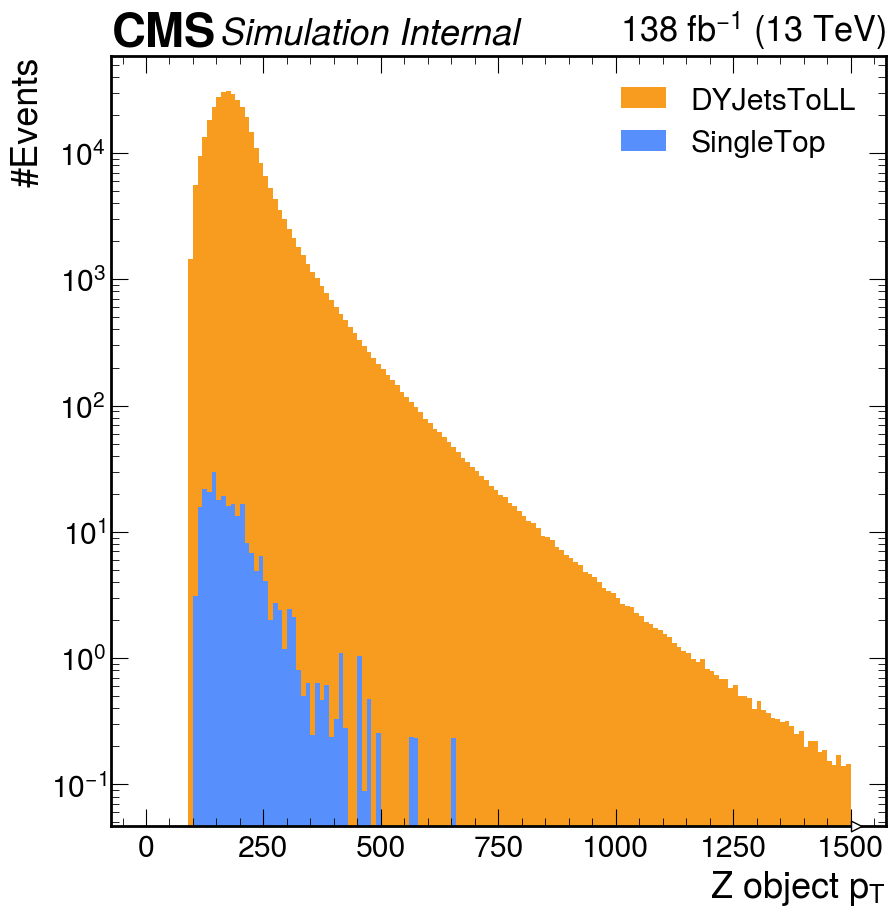

In [21]:
h2 = out2['ptz_mz_reco'].project('pt')
h3 = out3['ptz_mz_reco'].project('pt')
hep.histplot([h2, h3], stack = True, histtype='fill', label=['SingleTop', 'DYJetsToLL'] )
plt.xlabel(r'Z object $p_T$')
plt.ylabel("#Events")
plt.legend()
plt.yscale('log')
hep.cms.label("Internal", data = False, lumi = 138)

In [9]:
# filename1 = 'pythia_ht_LO_output.pkl'
# filename2 = 'herwig_ht_LO_output.pkl'
# #filename3 = 'herwig_ht_LO_output.pkl'


# with open('pythia_ht_LO_output_no_syst.pkl', "rb") as f:
#     out1 = pkl.load( f)
# with open('herwig_ht_LO_output_no_syst.pkl', "rb") as f:
#     out2 = pkl.load( f)
# print(out1.keys())

In [17]:
out = out1['ptjet_mjet_g_reco']+ out2['ptjet_mjet_g_reco']

ValueError: axes not mergable

In [29]:
keys = ['ptjet_mjet_u_reco', 'ptjet_mjet_g_reco']
dic = {}
for i,out in enumerate([out1, out2, out3]):
    for key in keys:
        if i==0:
            dic[key] = out[key].project('ptreco','mreco', 'systematic')
        else:
            dic[key]+= out[key].project('ptreco','mreco', 'systematic')

In [30]:
file_out = "data_all.pkl"
with open(file_out, "wb") as f:
    pkl.dump(dic, f)

In [5]:
?rebin_hist

Signature: rebin_hist(h, axis_name, edges)
Docstring: <no docstring>
File:      ~/new_git/zjet_corrections/tests/integrate_rebin.py
Type:      function

In [12]:
mreco_edges = [ 0., 5., 10., 20., 30., 40., 50., 60., 70., 80., 90., 100., 110., 120., 130., 140., 150., 160., 170., 180., 190., 200., 1000.]

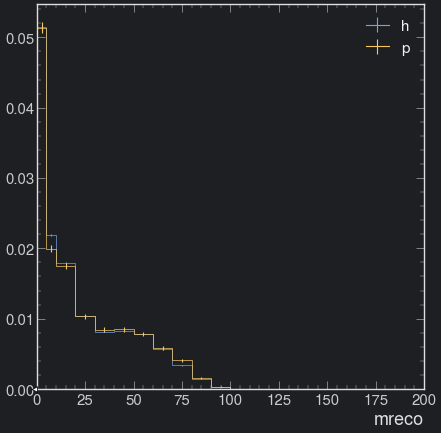

In [14]:
rebin_hist(out3['ptjet_mjet_g_reco'][{'systematic':'nominal'}].project('ptreco','mreco'),'mreco', mreco_edges)[0,:].plot(density = True, label = 'h')

out1['ptjet_mjet_g_reco'][{'systematic':'nominal'}].project('ptreco','mreco')[0,:].plot(density = True, label = 'p')
plt.xlim(0,200)
plt.legend()


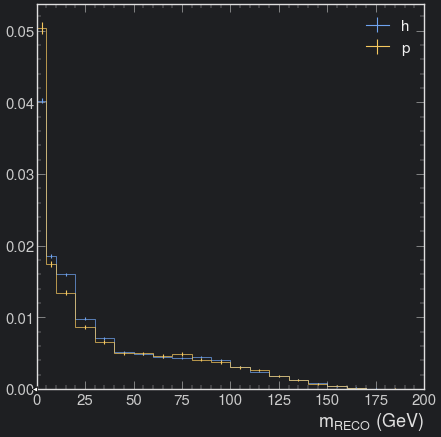

In [11]:
out3['ptjet_mjet_g_reco'][{'systematic':'nominal'}].project('ptreco','mreco')[2,:].plot(density = True, label = 'h')

out1['ptjet_mjet_g_reco'][{'systematic':'nominal'}].project('ptreco','mreco')[2,:].plot(density = True, label = 'p')
plt.xlim(0,200)
plt.legend()

(0.0, 500.0)

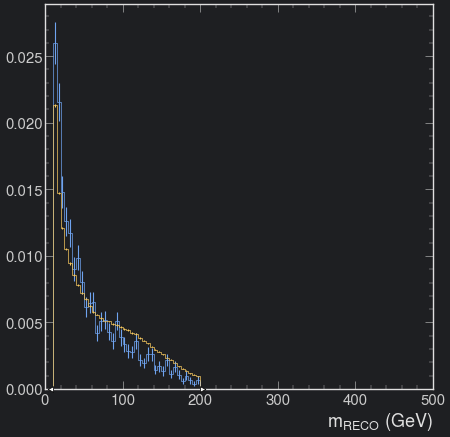

In [33]:
out2['ptjet_mjet_g_reco'][{'systematic':'nominal'}].project('ptreco','mreco')[2,hist.loc(10):hist.loc(500)][hist.rebin(5)].plot(density = True)
out1['ptjet_mjet_g_reco'][{'systematic':'nominal'}].project('ptreco','mreco')[2,hist.loc(10):hist.loc(500)][hist.rebin(5)].plot(density = True)
plt.xlim(0,500)

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f3e18f55810>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

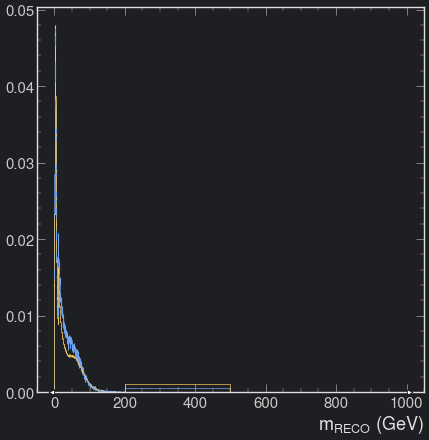

In [34]:
out2['ptjet_mjet_g_reco'][{'systematic':'nominal'}].project('mreco').plot(density = True)
out1['ptjet_mjet_g_reco'][{'systematic':'nominal'}].project('mreco').plot(density = True)
